In [79]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix
import sys 
sys.path.append('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/')
from RF_atomver import *
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier

from imblearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

In [62]:
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
feat_types = ['moe', 'mfp']
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']

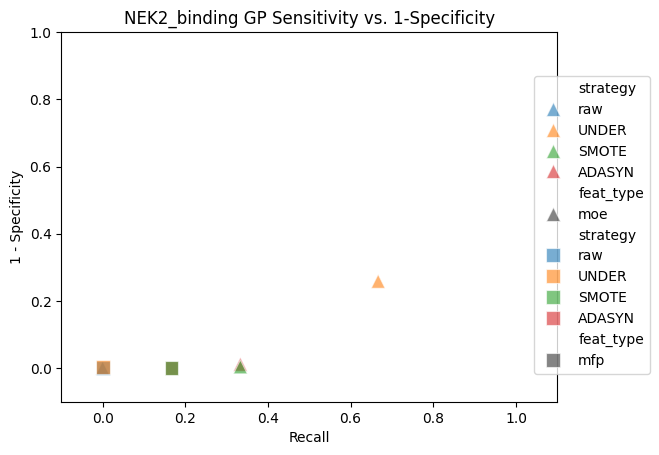

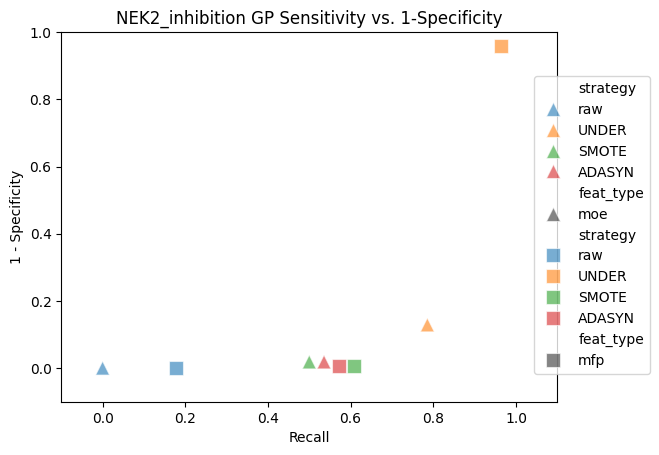

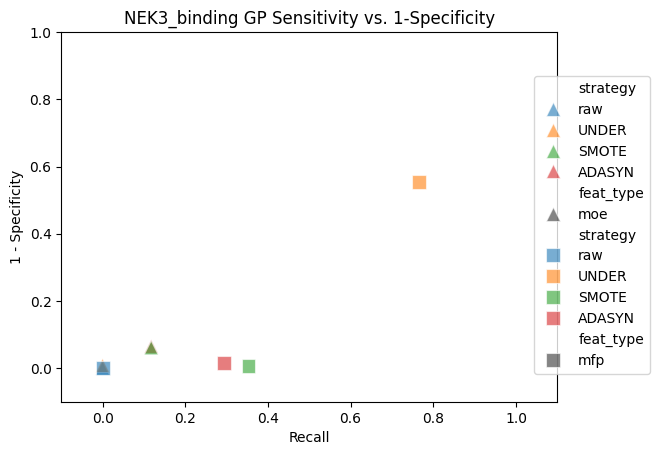

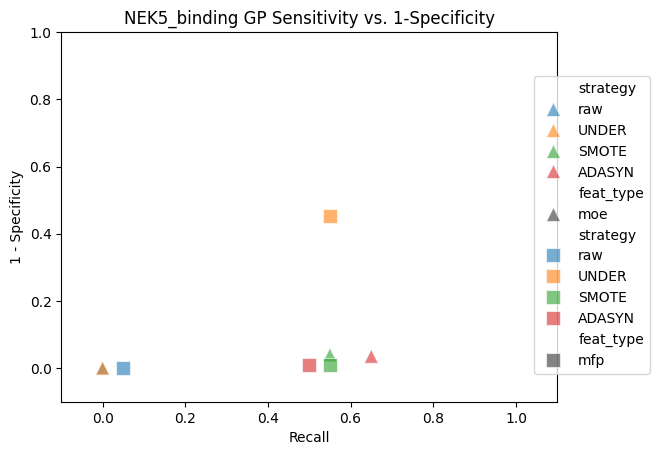

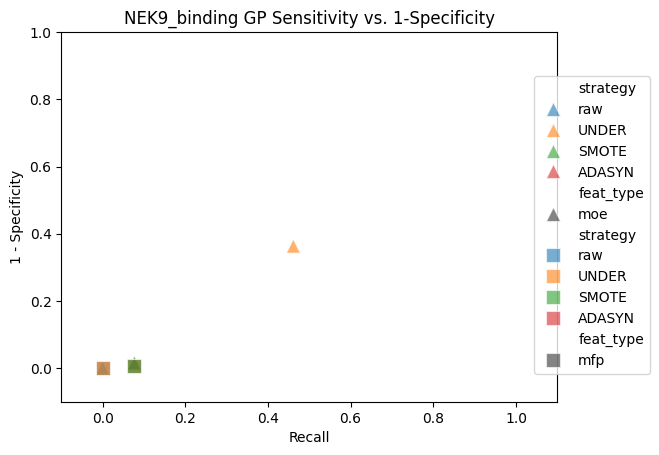

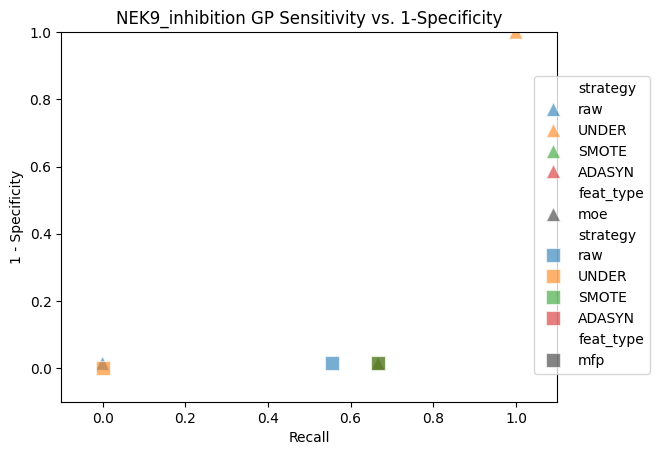

In [83]:
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_RF_RFGS_results_all_sets.csv')
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/best_models/sensitivity_1_specificity/'
gp= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP')]
gp = gp.replace('scaled','raw')
gp['1-specificity'] = 1-gp['specificity']
# x axis is recall, y = 1-specificity 
hue_order = ['raw', 'UNDER', 'SMOTE', 'ADASYN']
for nek in neks:
    moe_df = gp[(gp['NEK']==nek) & (gp['feat_type']=='moe')]
    mfp_df = gp[(gp['NEK']==nek) & (gp['feat_type']=='mfp')]
    plt.figure()
    sns.scatterplot(data=moe_df, x='recall', y='1-specificity', hue='strategy', style='feat_type', markers=['^'], s=100, hue_order=hue_order,alpha=0.6)
    sns.scatterplot(data=mfp_df, x='recall', y='1-specificity', hue='strategy', style='feat_type', markers=['s'], s=100,hue_order=hue_order,alpha=0.6)
    
    plt.title(f'{nek} GP Sensitivity vs. 1-Specificity')
    plt.xlabel("Recall")
    plt.ylabel("1 - Specificity")
    plt.ylim(-0.1,1)
    plt.xlim(-0.1,1.1)
    plt.legend(bbox_to_anchor = [1.2, 0.9])

    plt.savefig(f'{figure_path}GP_{nek}_positive_rate_scatter.png',bbox_inches='tight' )
  
    plt.show();

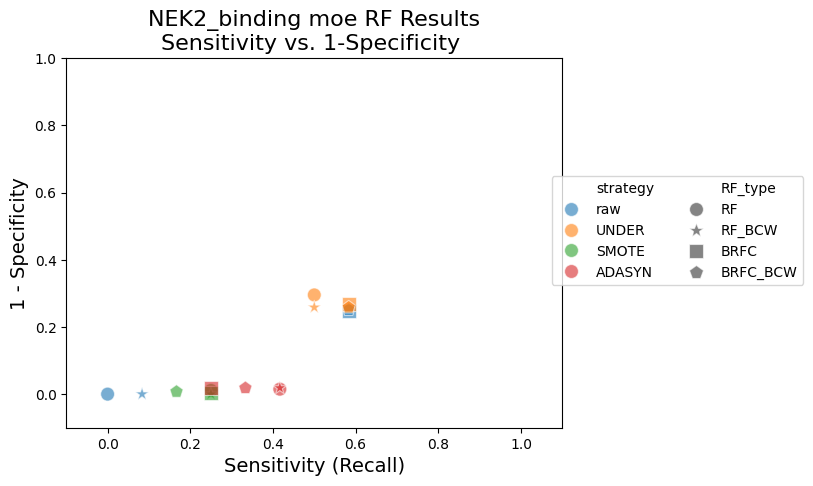

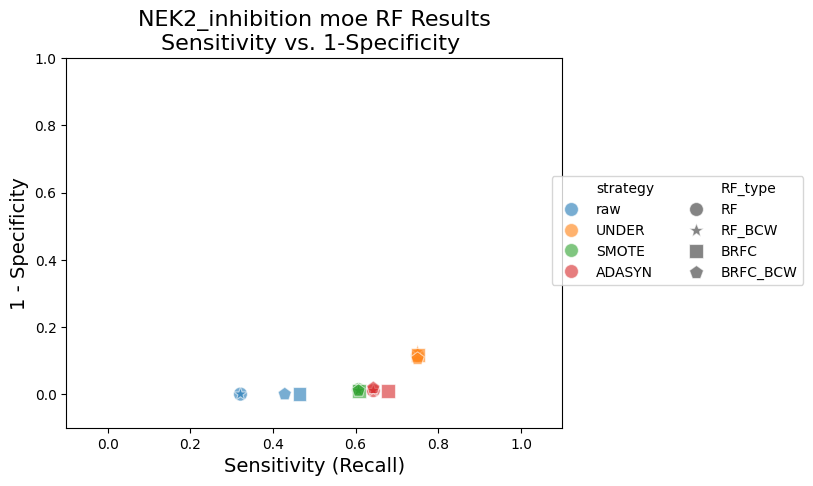

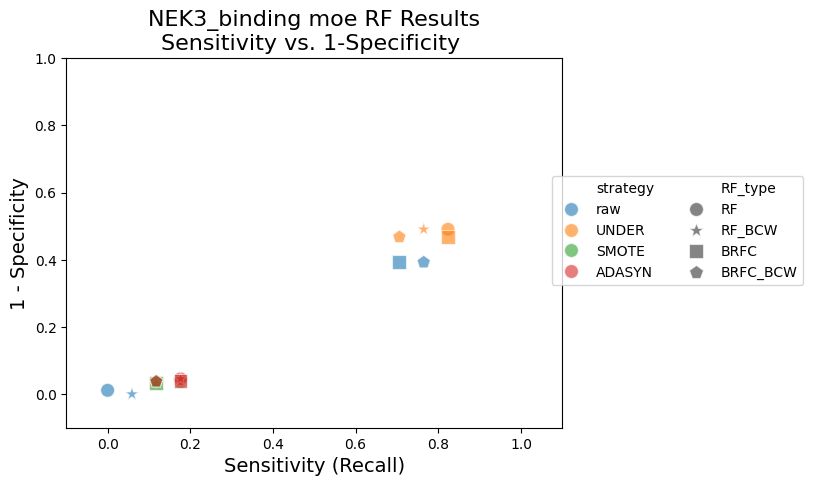

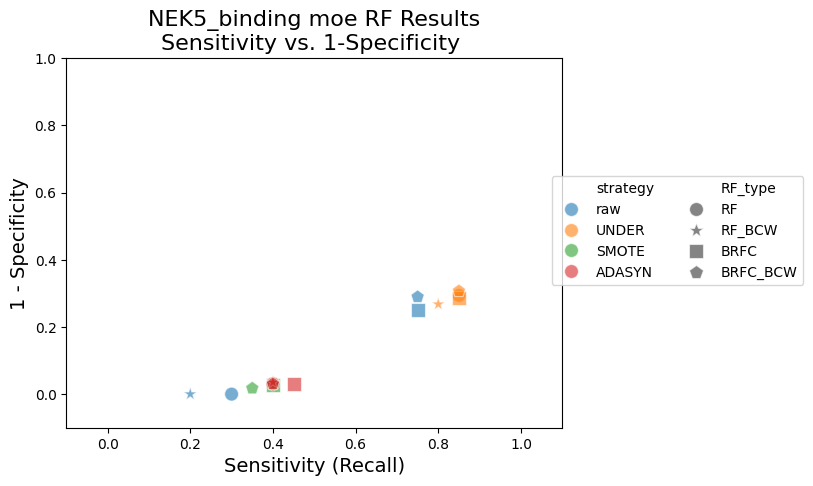

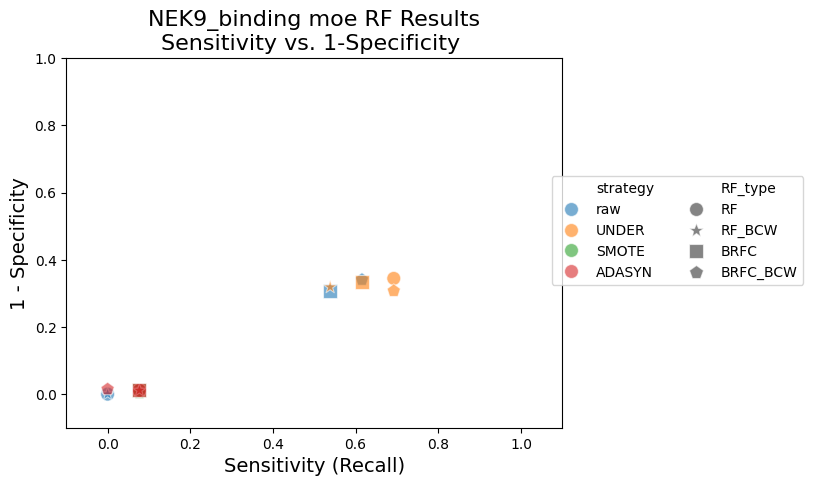

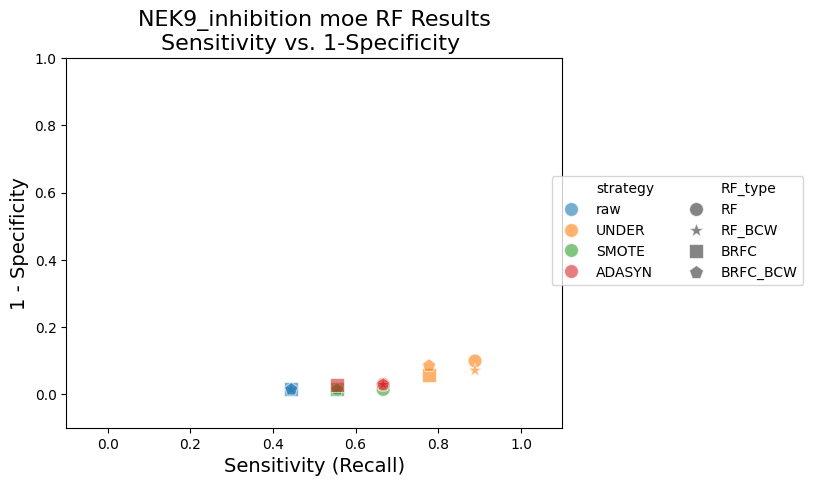

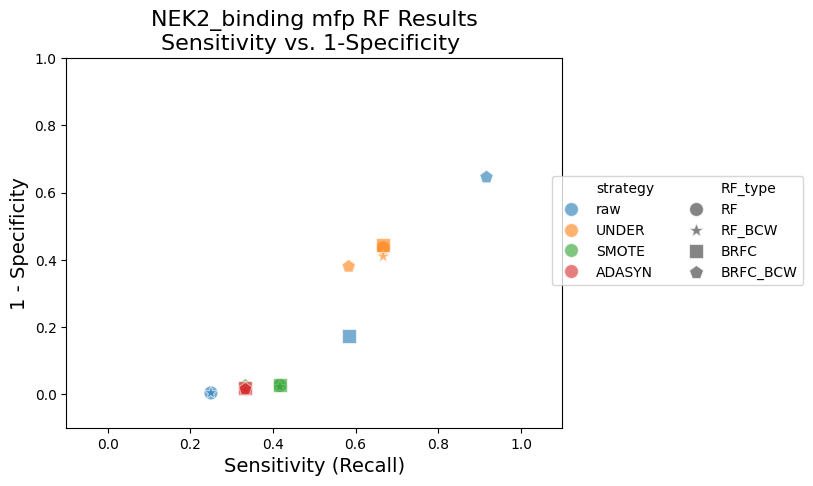

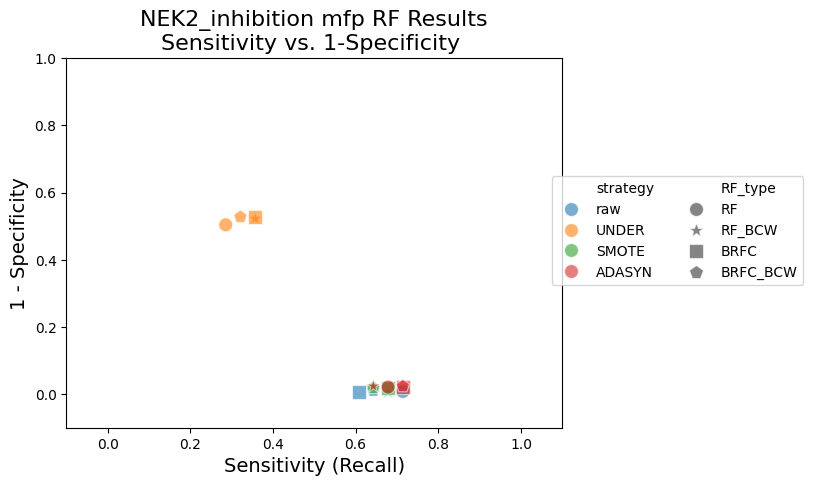

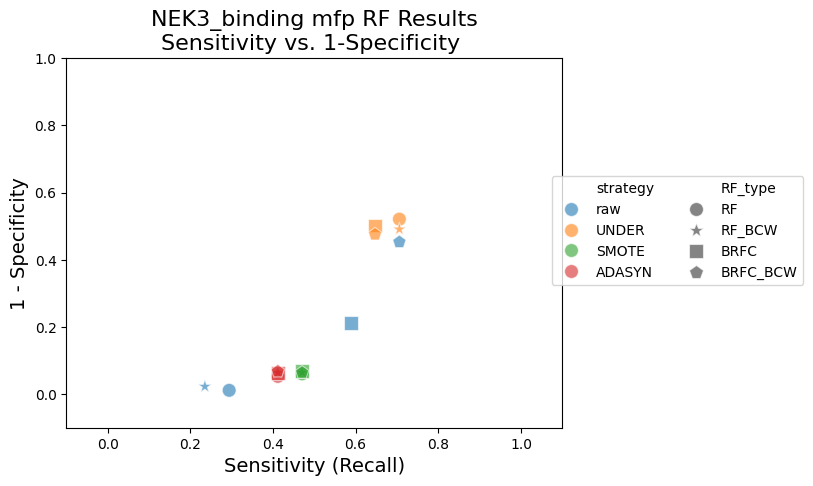

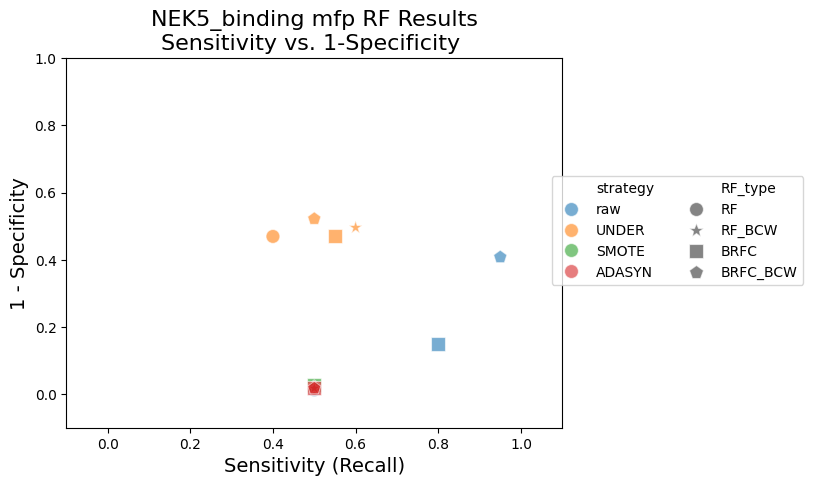

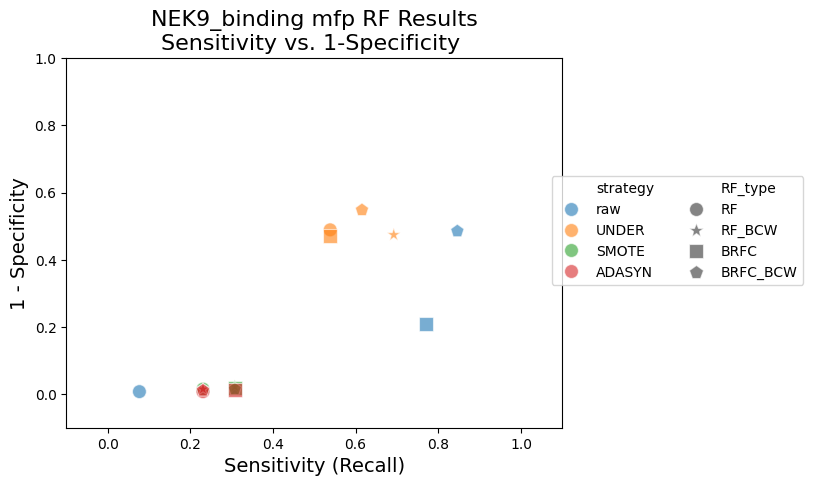

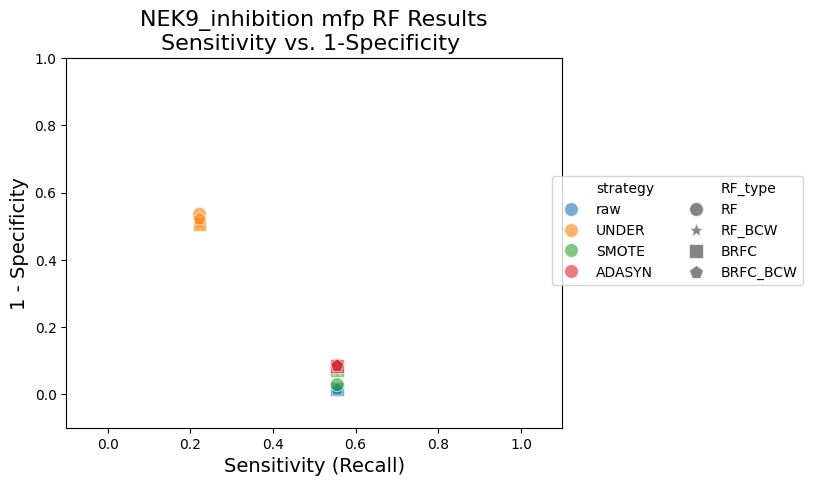

In [91]:
RFresult_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/'
df2 = pd.read_csv(f'{RFresult_path}RF_test_results_all_NEK.csv')
df2['1-specificity'] = 1-df2['specificity']
markers = {'RF': 'o', 'RF_BCW': '*', 'BRFC':'s', 'BRFC_BCW': 'p'}
strategy_colors = {'raw': 'tab:blue', 'UNDER':'tab:orange', 'SMOTE': 'tab:green', 'ADASYN':'tab:red'}
for feat in feat_types: 
    for nek in neks:
        plt.figure()
        # for rf, st in markers.items(): 
        df = df2[(df2['NEK']==nek) & (df2['feat_type']==feat)]
        this_rf = df[df['RF_type'] == rf]
        sns.scatterplot(data=df, x='recall', y='1-specificity', hue='strategy', style = 'RF_type',markers=markers, 
                        s=100, hue_order=hue_order,alpha=0.6,)
        
        plt.title(f'{nek} {feat} RF Results\nSensitivity vs. 1-Specificity ',fontsize=16)
        plt.xlabel('Sensitivity (Recall)', fontsize=14)
        plt.ylabel('1 - Specificity',fontsize=14)
        plt.ylim(-0.1,1)
        plt.xlim(-0.1,1.1)
        plt.legend(ncols=2,bbox_to_anchor = [1.5, 0.7])
    
        plt.savefig(f'{figure_path}RF_{nek}_{feat}_positive_rate_scatter.png',bbox_inches='tight' )
      
        plt.show();

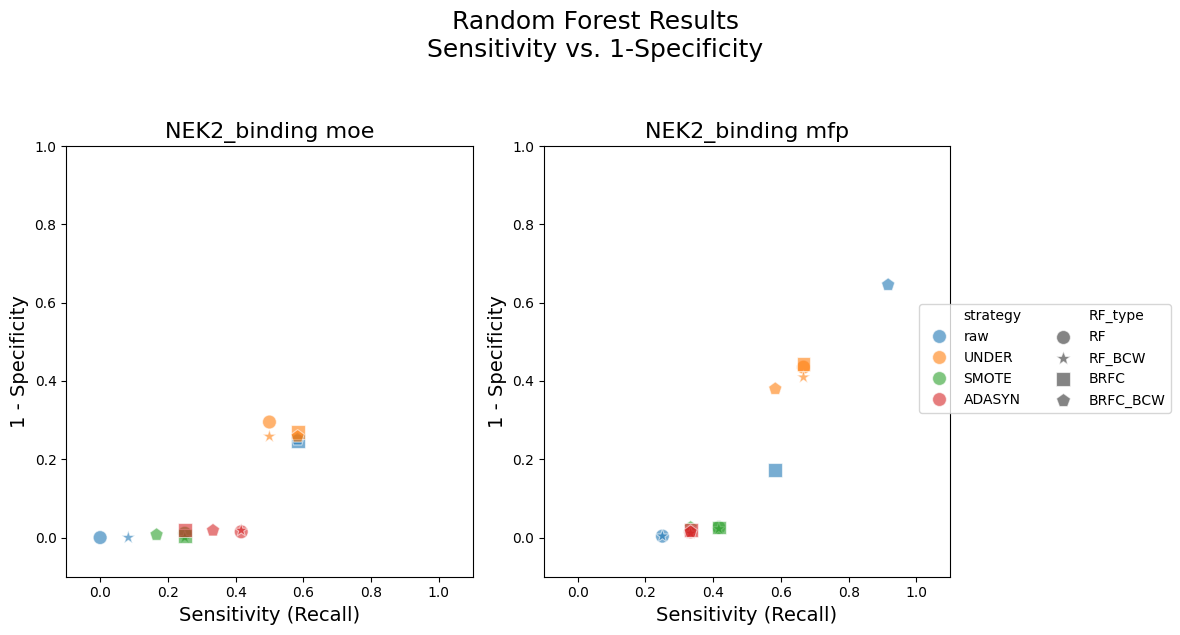

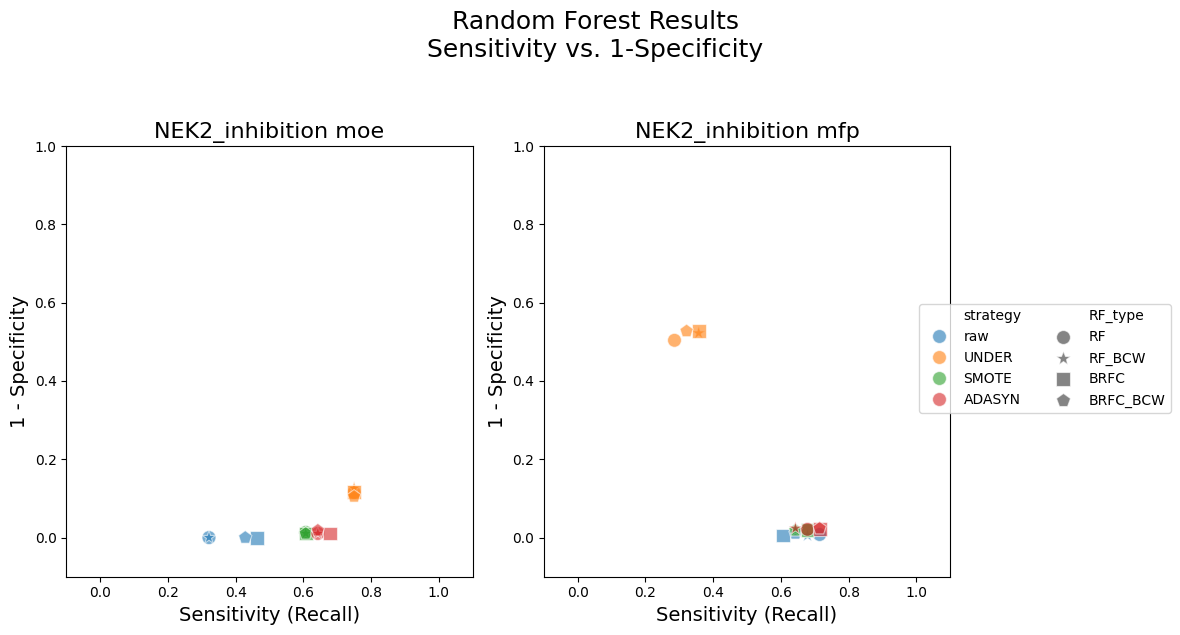

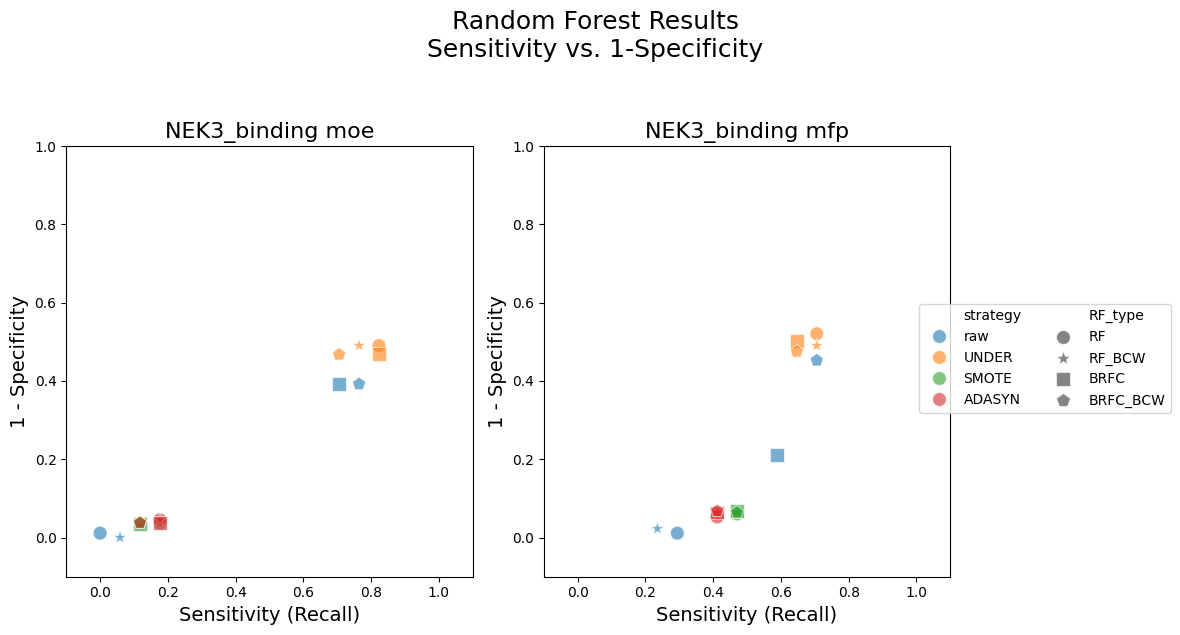

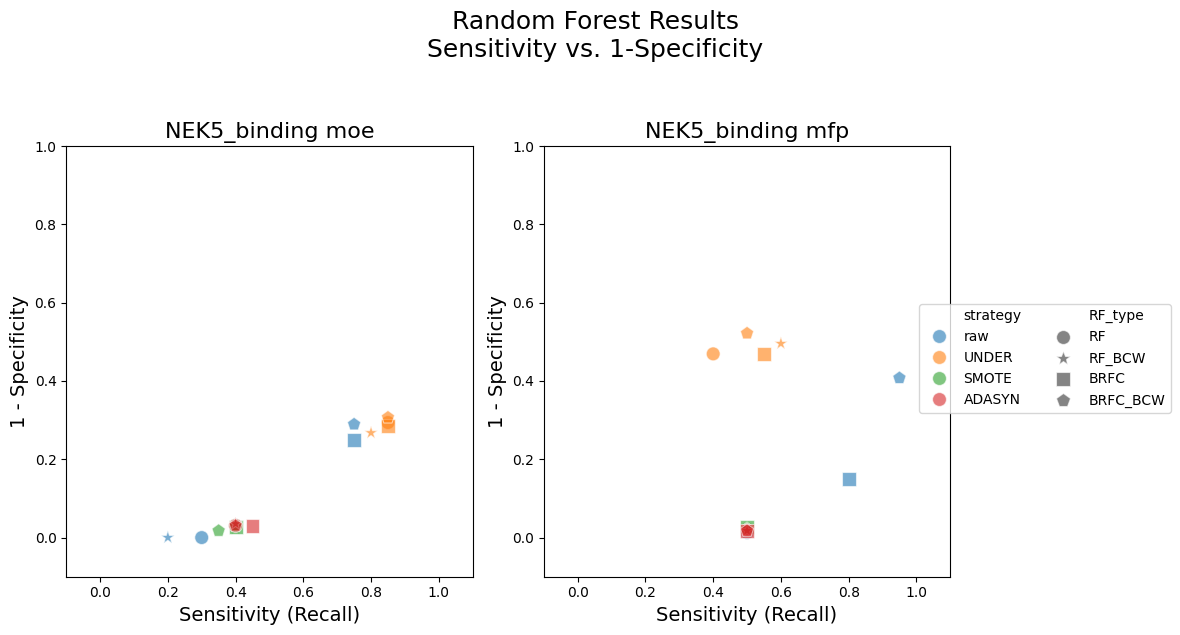

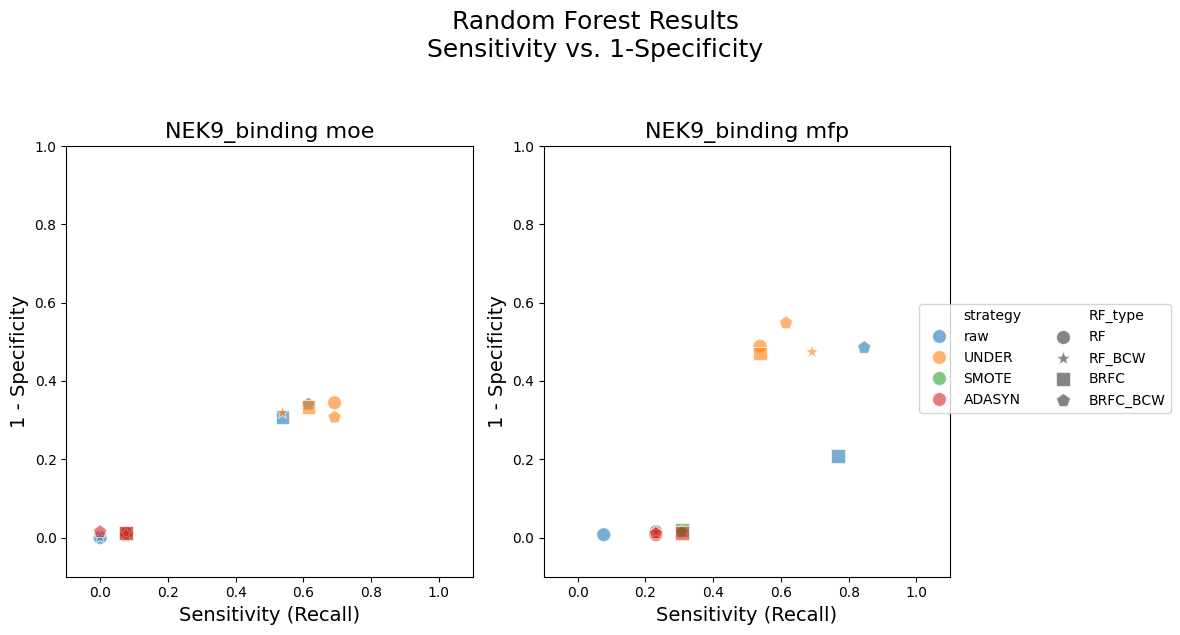

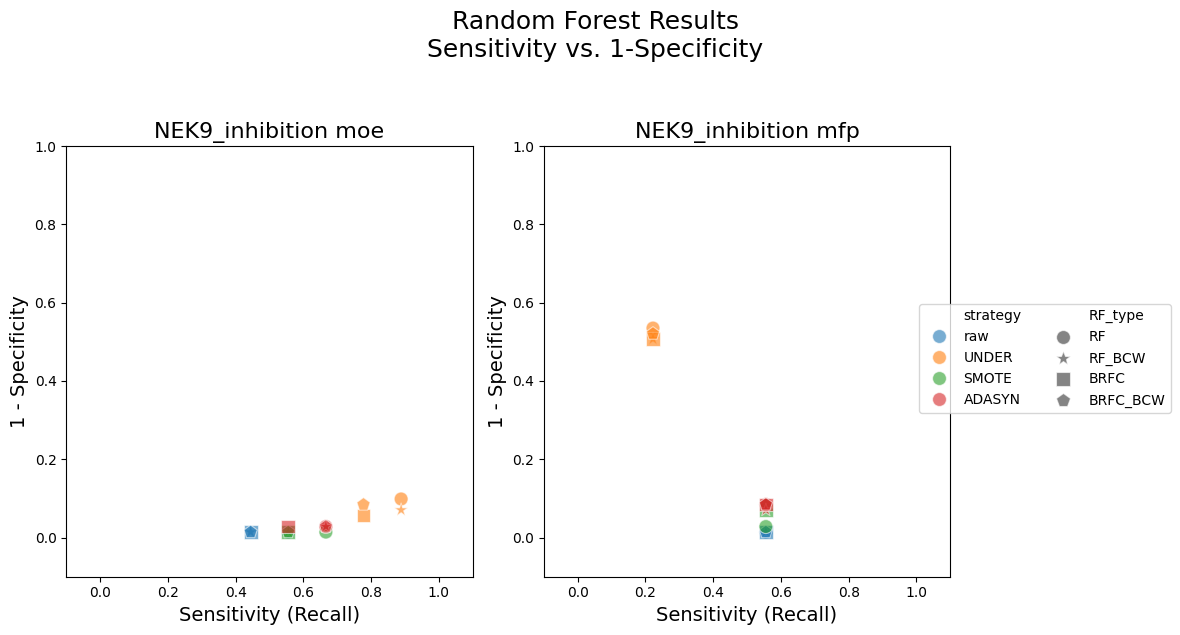

In [136]:

for nek in neks:
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    moe_df = df2[(df2['NEK'] == nek) & (df2['feat_type'] == 'moe')]
    mfp_df = df2[(df2['NEK'] == nek) & (df2['feat_type'] == 'mfp')]
    sns.scatterplot(data=moe_df, x='recall', y='1-specificity', hue='strategy', style='RF_type',
                    markers=markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[0])
    sns.scatterplot(data=mfp_df, x='recall', y='1-specificity', hue='strategy', style='RF_type',
                    markers=markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[1])
    plt.suptitle('Random Forest Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.5, y =1.05)
    axs[0].set_title(f'{nek} moe', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'{nek} mfp', fontsize=16)
    axs[0].set_xlabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_ylabel('1 - Specificity', fontsize=14)
    axs[1].set_xlabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_ylabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1)
    axs[1].set_xlim(-0.1, 1.1)
    

    axs[1].legend(ncols=2, bbox_to_anchor=(1.56, 0.65))
    plt.tight_layout()
    
    plt.savefig(f'{figure_path}subplots_moemfp/{nek}_RF_moemfp_positive_rate_scatter.png', bbox_inches='tight')


plt.show();

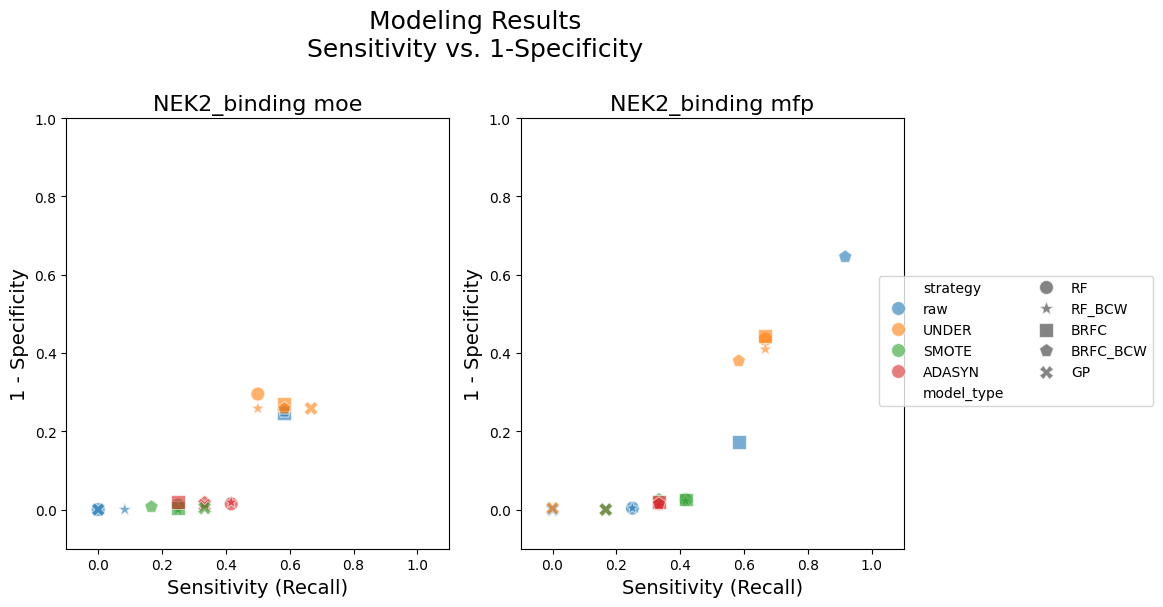

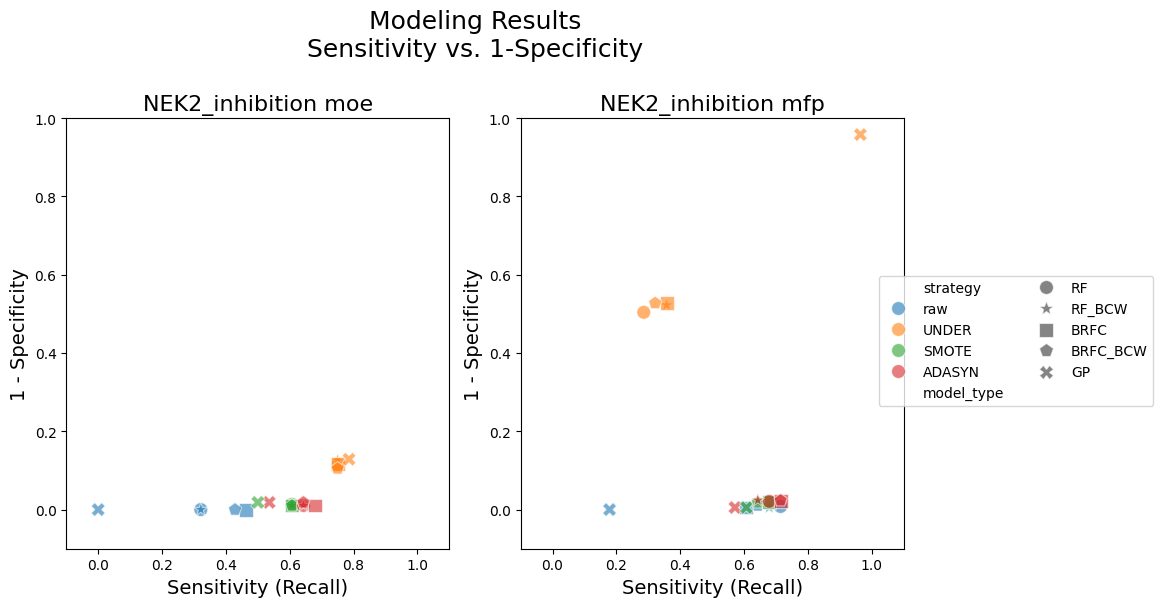

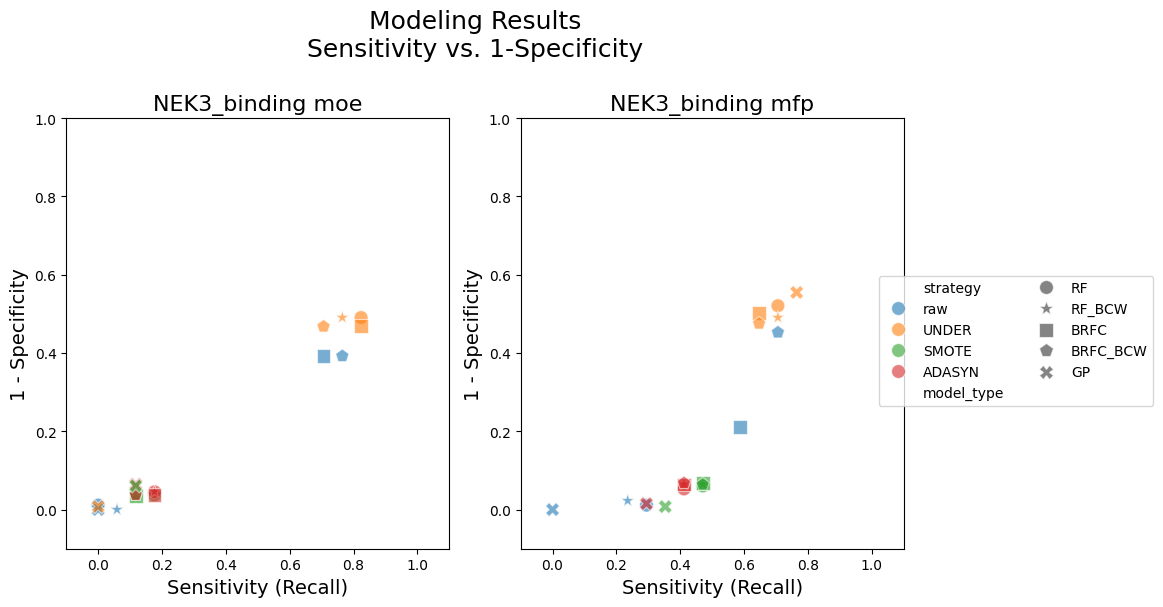

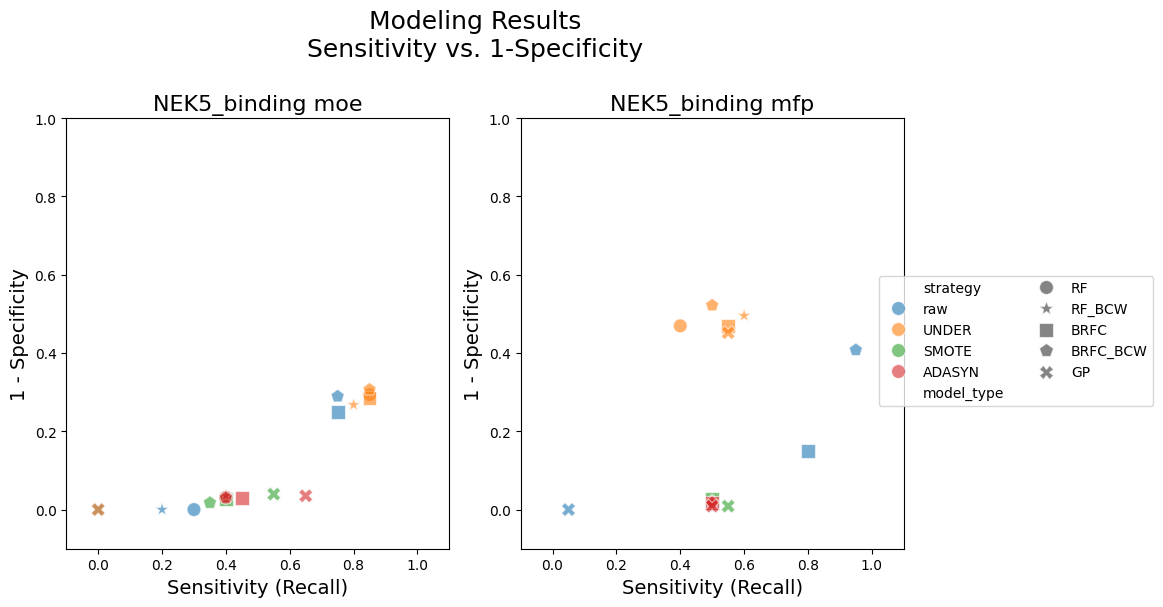

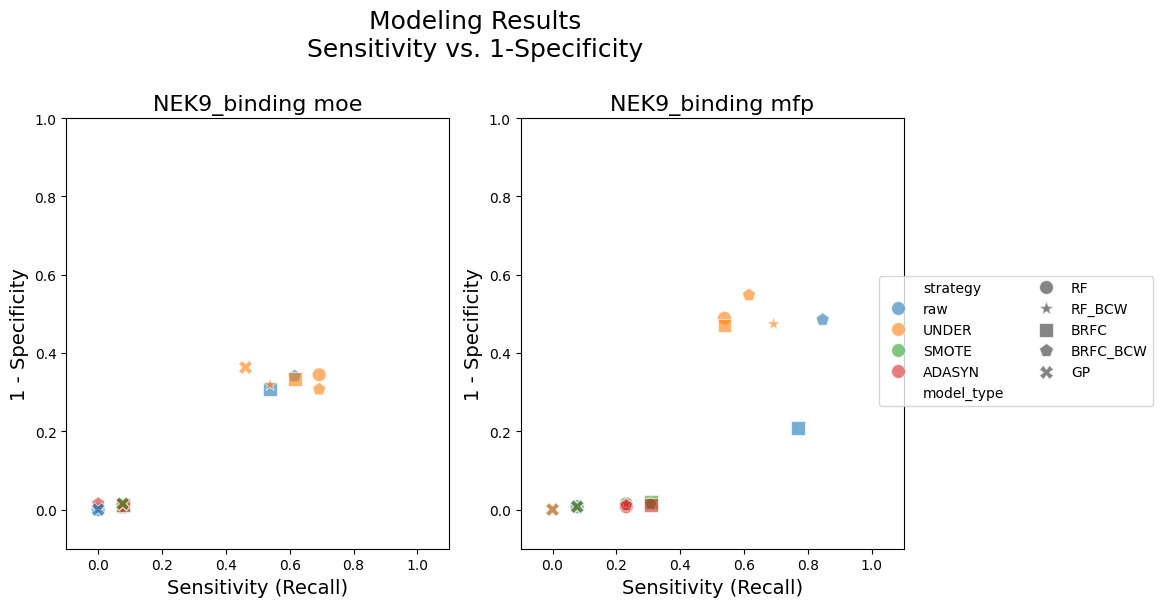

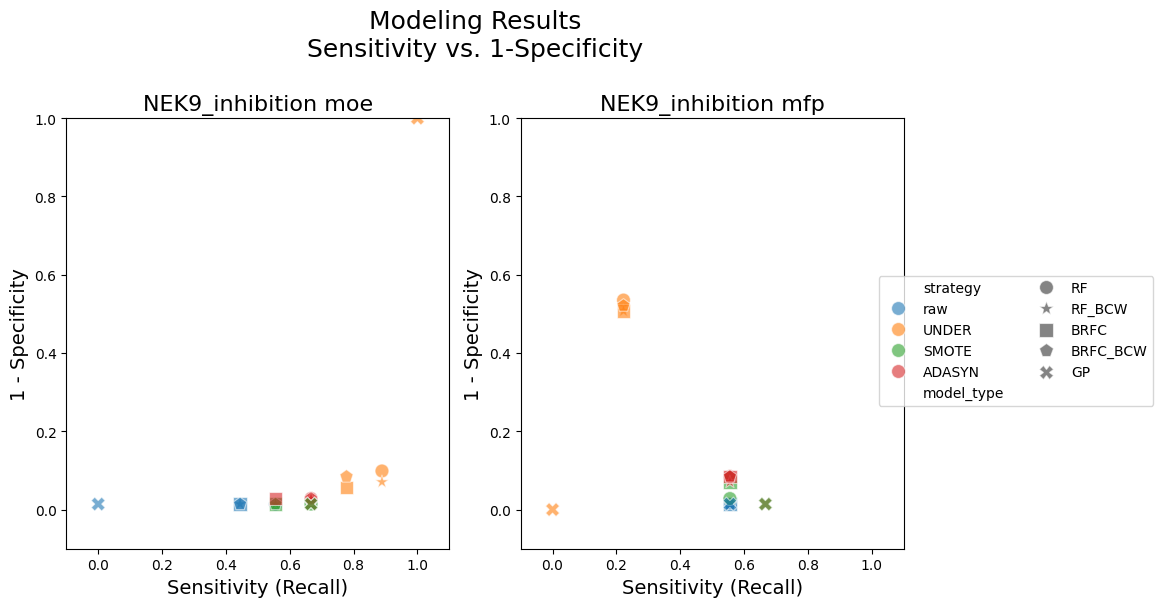

In [150]:
rfdf = df2.copy()
rfdf['model_type'] =rfdf['RF_type']
gp['model_type'] = 'GP' 
combo = pd.concat([rfdf, gp])
combo['1-specificity'] = 1-combo['specificity']
markers2 = {'RF': 'o', 'RF_BCW': '*', 'BRFC':'s', 'BRFC_BCW': 'p', 'GP': 'X'}

for nek in neks:
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    moe_df = combo[(combo['NEK'] == nek) & (combo['feat_type'] == 'moe')]
    
    mfp_df = combo[(combo['NEK'] == nek) & (combo['feat_type'] == 'mfp')]
    sns.scatterplot(data=moe_df, x='recall', y='1-specificity', hue='strategy', style='model_type',
                    markers=markers2, s=100, hue_order=hue_order, alpha=0.6, ax=axs[0])
    sns.scatterplot(data=mfp_df, x='recall', y='1-specificity', hue='strategy', style='model_type',
                    markers=markers2, s=100, hue_order=hue_order, alpha=0.6, ax=axs[1])
    plt.suptitle('Modeling Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.4, y =1.005)
    axs[0].set_title(f'{nek} moe', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'{nek} mfp', fontsize=16)
    axs[0].set_xlabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_ylabel('1 - Specificity', fontsize=14)
    axs[1].set_xlabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_ylabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1)
    axs[1].set_xlim(-0.1, 1.1)
    

    axs[1].legend(ncols=2, bbox_to_anchor=(1.67, 0.65))
    plt.tight_layout()
    
    plt.savefig(f'{figure_path}subplots_moemfp/GPRF_{nek}_moemfp_positive_rate_scatter.png', bbox_inches='tight')


plt.show();